In [7]:
import pandas as pd

df = pd.read_csv('Kochi_SO2.txt')


In [8]:
import numpy as np

In [9]:
df

,date,open_SO2,sate_SO2,"Vyttila, Kochi - Kerala PCB"
0,2020-11-24,6.215000,-0.030,6.98
1,2020-11-25,2.563333,0.470,23.56
2,2020-11-26,7.198333,-0.038,20.49
3,2020-11-27,10.084167,0.070,16.57
4,2020-11-28,10.718333,0.130,12.61
...,...,...,...,...
398,2021-12-27,8.374583,-0.010,21.33
399,2021-12-28,8.975417,0.114,21.20
400,2021-12-29,9.517083,-0.390,19.62
401,2021-12-30,11.864167,-0.132,19.36


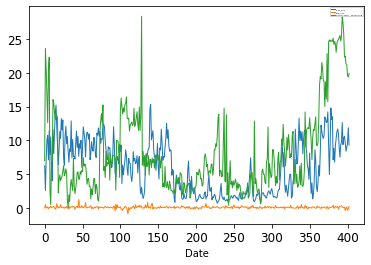

In [10]:
ax = df.plot(linewidth=1, fontsize=12);
ax.set_xlabel('Date');
ax.legend(fontsize=2);

In [11]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [12]:
y = df['open_SO2']
x = df.drop(columns =["date", "open_SO2"])

In [13]:
df.describe()

,open_SO2,sate_SO2,"Vyttila, Kochi - Kerala PCB"
count,403.000000,403.000000,403.000000
mean,6.112214,0.066319,8.197792
std,3.865415,0.172598,6.335538
min,0.672917,-0.910000,0.090000
25%,2.100208,-0.023000,3.575000
50%,6.279167,0.060000,6.110000
75%,9.305625,0.130000,11.535000
max,15.319167,1.210000,28.370000


# Normal OLS

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression().fit(x,y)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

3.14367373933404

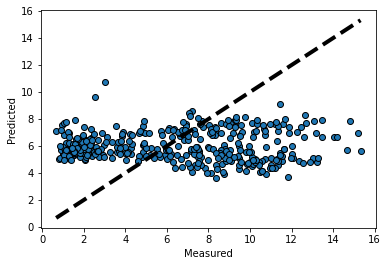

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# LASSO

In [16]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
model = linear_model.Lasso(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

3.1505938315131443

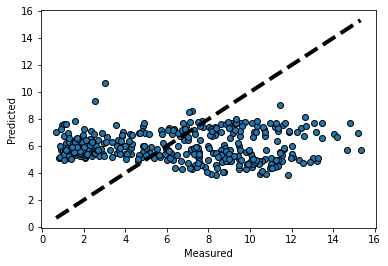

In [17]:


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Ridge

In [18]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

3.143716861694876

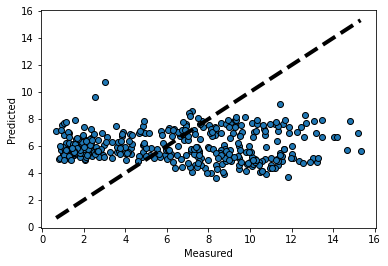

In [19]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Elastic Net

In [20]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

3.1573943283466788

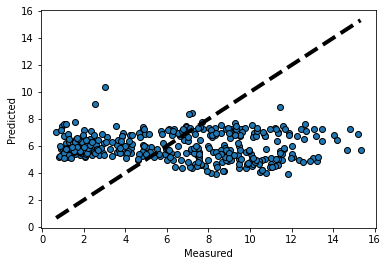

In [21]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Decision tree

In [22]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

4.1574746106398015

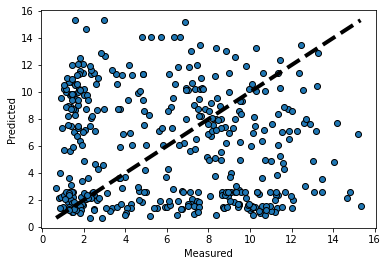

In [23]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [24]:
regr = tree.DecisionTreeRegressor()
model = regr.fit(x, y)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 13.93
|   |--- feature_1 <= 3.00
|   |   |--- feature_1 <= 1.38
|   |   |   |--- feature_1 <= 0.88
|   |   |   |   |--- feature_0 <= 0.17
|   |   |   |   |   |--- feature_0 <= -0.09
|   |   |   |   |   |   |--- value: [8.37]
|   |   |   |   |   |--- feature_0 >  -0.09
|   |   |   |   |   |   |--- feature_1 <= 0.70
|   |   |   |   |   |   |   |--- feature_1 <= 0.46
|   |   |   |   |   |   |   |   |--- value: [0.87]
|   |   |   |   |   |   |   |--- feature_1 >  0.46
|   |   |   |   |   |   |   |   |--- value: [1.06]
|   |   |   |   |   |   |--- feature_1 >  0.70
|   |   |   |   |   |   |   |--- value: [1.40]
|   |   |   |   |--- feature_0 >  0.17
|   |   |   |   |   |--- value: [10.50]
|   |   |   |--- feature_1 >  0.88
|   |   |   |   |--- feature_0 <= 0.23
|   |   |   |   |   |--- feature_1 <= 0.96
|   |   |   |   |   |   |--- value: [8.73]
|   |   |   |   |   |--- feature_1 >  0.96
|   |   |   |   |   |   |--- feature_0 <= -0.03
|   |   |   |   |   |   |   |--- value

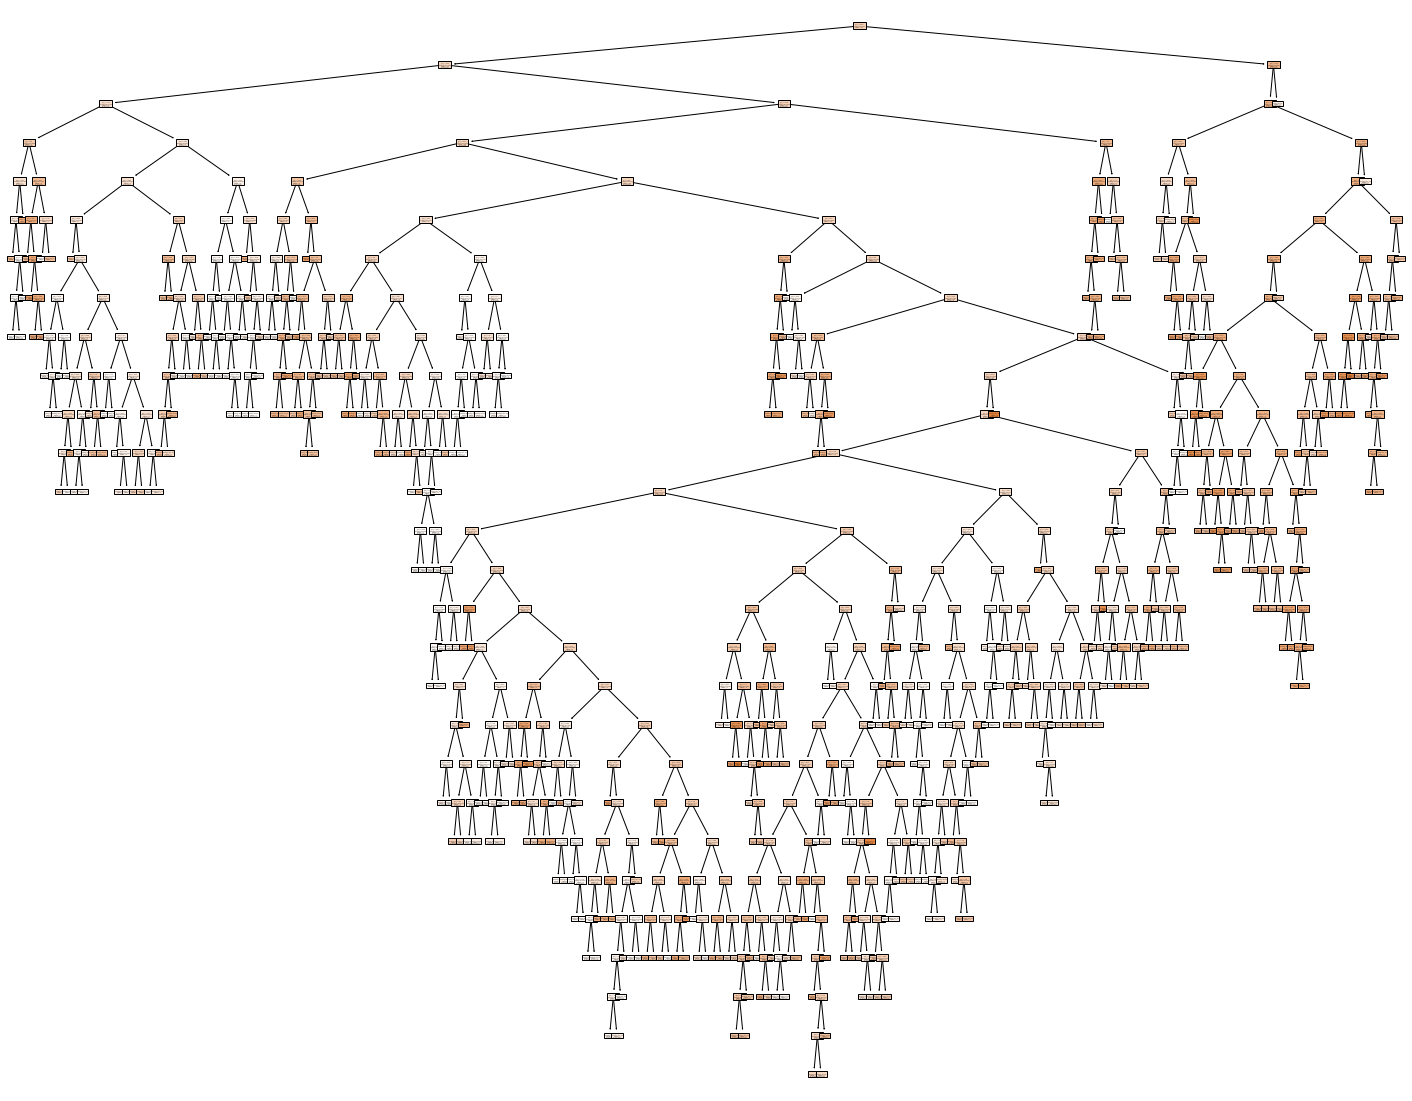

In [25]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)